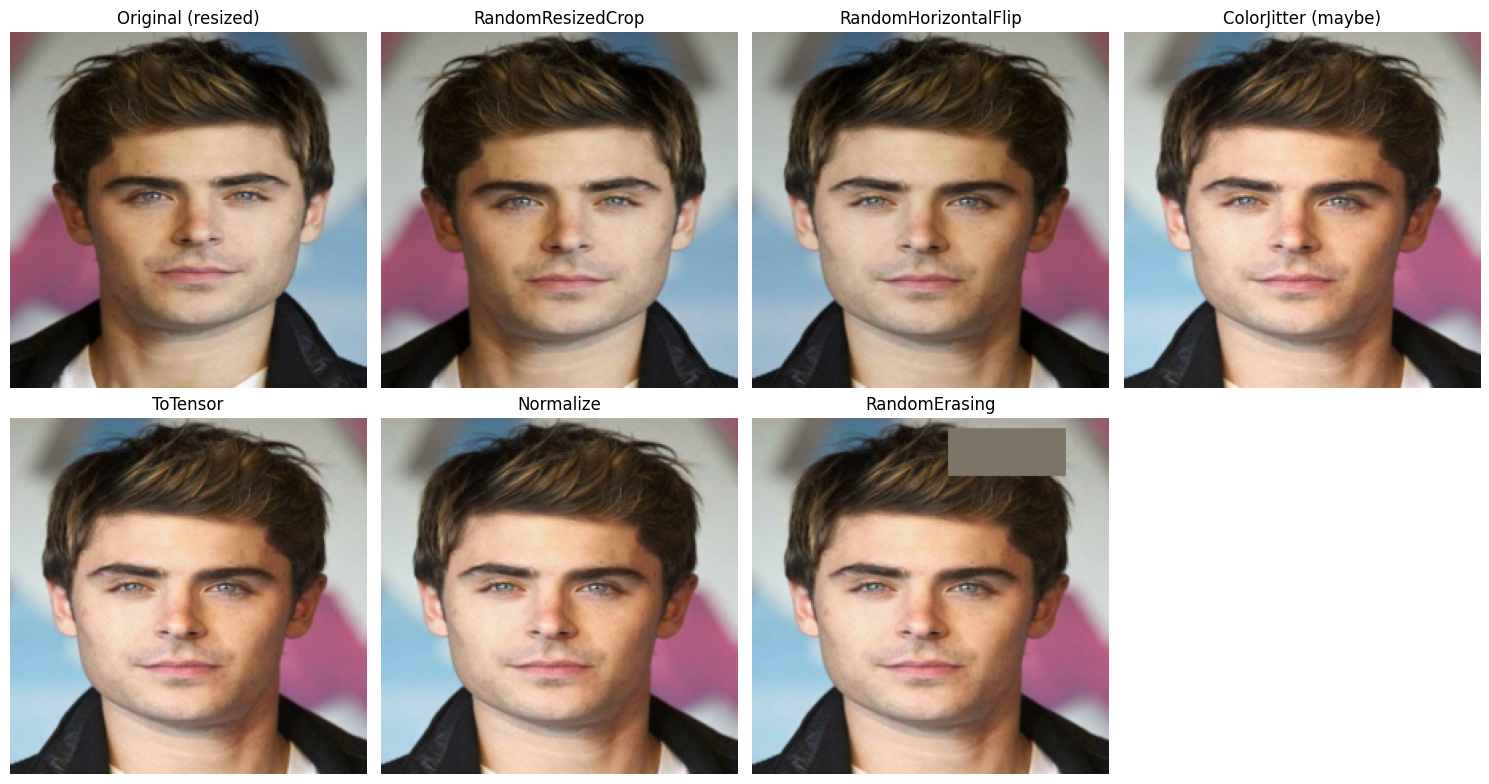

In [12]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# -------------------
# Config
# -------------------
IMG_SIZE = 224
IMG_PATH = "/home/phamtiendat/Documents/ComputerVision/Image_processing/Raw_Images/Unknown_Normal/6 (70).jpeg"   # put your test image here

# -------------------
# Utility: show tensor as image
# -------------------
def imshow(img_tensor, title=""):
    img = img_tensor.clone().detach()
    img = img.cpu().numpy().transpose(1, 2, 0)
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

# -------------------
# Step-by-step augmentation
# -------------------
def visualize_pipeline(img_path):
    img = Image.open(img_path).convert("RGB")

    steps = []
    titles = []

    # 1. Original
    steps.append(transforms.Resize((IMG_SIZE, IMG_SIZE))(img))
    titles.append("Original (resized)")

    # 2. RandomResizedCrop
    rrc = transforms.RandomResizedCrop(IMG_SIZE, scale=(0.6,1.0))
    out = rrc(img)
    steps.append(out)
    titles.append("RandomResizedCrop")

    # 3. RandomHorizontalFlip
    rhf = transforms.RandomHorizontalFlip(0.5)
    out = rhf(out)
    steps.append(out)
    titles.append("RandomHorizontalFlip")

    # 4. RandomApply(ColorJitter)
    cj = transforms.ColorJitter(0.2,0.2,0.2,0.05)
    ra = transforms.RandomApply([cj], p=0.5)
    out = ra(out)
    steps.append(out)
    titles.append("ColorJitter (maybe)")

    # 5. ToTensor
    out = transforms.ToTensor()(out)
    steps.append(out)
    titles.append("ToTensor")

    # 6. Normalize
    normalize = transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    out_norm = normalize(out.clone())
    steps.append(out_norm)
    titles.append("Normalize")

    # 7. RandomErasing
    re = transforms.RandomErasing(p=1.0, scale=(0.01,0.05))  # force apply to visualize
    out_erased = re(out_norm.clone())
    steps.append(out_erased)
    titles.append("RandomErasing")

    # -------------------
    # Display in grid
    # -------------------
    n = len(steps)
    plt.figure(figsize=(15, 8))
    for i in range(n):
        plt.subplot(2, (n+1)//2, i+1)
        if isinstance(steps[i], torch.Tensor):
            # For normalized images, denormalize to show
            if titles[i] in ["Normalize","RandomErasing"]:
                denorm = transforms.Normalize(
                    mean=[-m/s for m, s in zip([0.485,0.456,0.406],[0.229,0.224,0.225])],
                    std=[1/s for s in [0.229,0.224,0.225]]
                )
                imshow(denorm(steps[i]), titles[i])
            else:
                imshow(steps[i], titles[i])
        else:
            plt.imshow(steps[i])
            plt.title(titles[i])
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# -------------------
# Run visualization
# -------------------
visualize_pipeline(IMG_PATH)
